#Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyClassifier

#Function for applying models

In [2]:
#Function for applying models
def apply_model(model, X_train, X_test, y_train, y_test, name):
    #Train and evaluate a model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print(f'{name} performance:')
    print(f'Accuracy: {acc}')
    print(f'Confusion Matrix: {cm}')
    print(f'Classification Report: {cr}')
    
    
    # plot the confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()
    #return accuracy
    return acc

#Dementia Disease Prediction

##Importing Dataset

In [3]:
#Loading Data Set
d_data=pd.read_csv("E:/ml_class_project/dementia_dataset.csv")

##Exploring Dataset

In [4]:
#Printing First Five Rows
print(d_data.head())

  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV  nWBV  ASF  
0 2.00 27.00 0.00  1987  0.70 0.88  
1 2.00 30.00 0.00  2004  0.68 0.88  
2  NaN 23.00 0.50  1678  0.74 1.05  
3  NaN 28.00 0.50  1738  0.71 1.01  
4  NaN 22.00 0.50  1698  0.70 1.03  


In [5]:
#Printing Last Five Rows
print(d_data.tail())

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV  nWBV  ASF  
368    16 1.00 28.00 0.50  1693  0.69 1.04  
369    16 1.00 26.00 0.50  1688  0.68 1.04  
370    13 2.00 30.00 0.00  1319  0.80 1.33  
371    13 2.00 30.00 0.00  1327  0.80 1.32  
372    13 2.00 30.00 0.00  1333  0.80 1.32  


In [6]:
#Describing Data
print(d_data.describe())

       Visit  MR Delay    Age   EDUC    SES   MMSE    CDR    eTIV   nWBV  \
count 373.00    373.00 373.00 373.00 354.00 371.00 373.00  373.00 373.00   
mean    1.88    595.10  77.01  14.60   2.46  27.34   0.29 1488.13   0.73   
std     0.92    635.49   7.64   2.88   1.13   3.68   0.37  176.14   0.04   
min     1.00      0.00  60.00   6.00   1.00   4.00   0.00 1106.00   0.64   
25%     1.00      0.00  71.00  12.00   2.00  27.00   0.00 1357.00   0.70   
50%     2.00    552.00  77.00  15.00   2.00  29.00   0.00 1470.00   0.73   
75%     2.00    873.00  82.00  16.00   3.00  30.00   0.50 1597.00   0.76   
max     5.00   2639.00  98.00  23.00   5.00  30.00   2.00 2004.00   0.84   

         ASF  
count 373.00  
mean    1.20  
std     0.14  
min     0.88  
25%     1.10  
50%     1.19  
75%     1.29  
max     1.59  


In [7]:
#Checking For Missing Values
print(d_data.isnull().sum())

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [8]:
#Handling Missing Values
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(d_data.iloc[:,9:11])
d_data.iloc[:,9:11]=imputer.transform(d_data.iloc[:,9:11])
print(d_data.isnull().sum())

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


##Visualizing Dataset

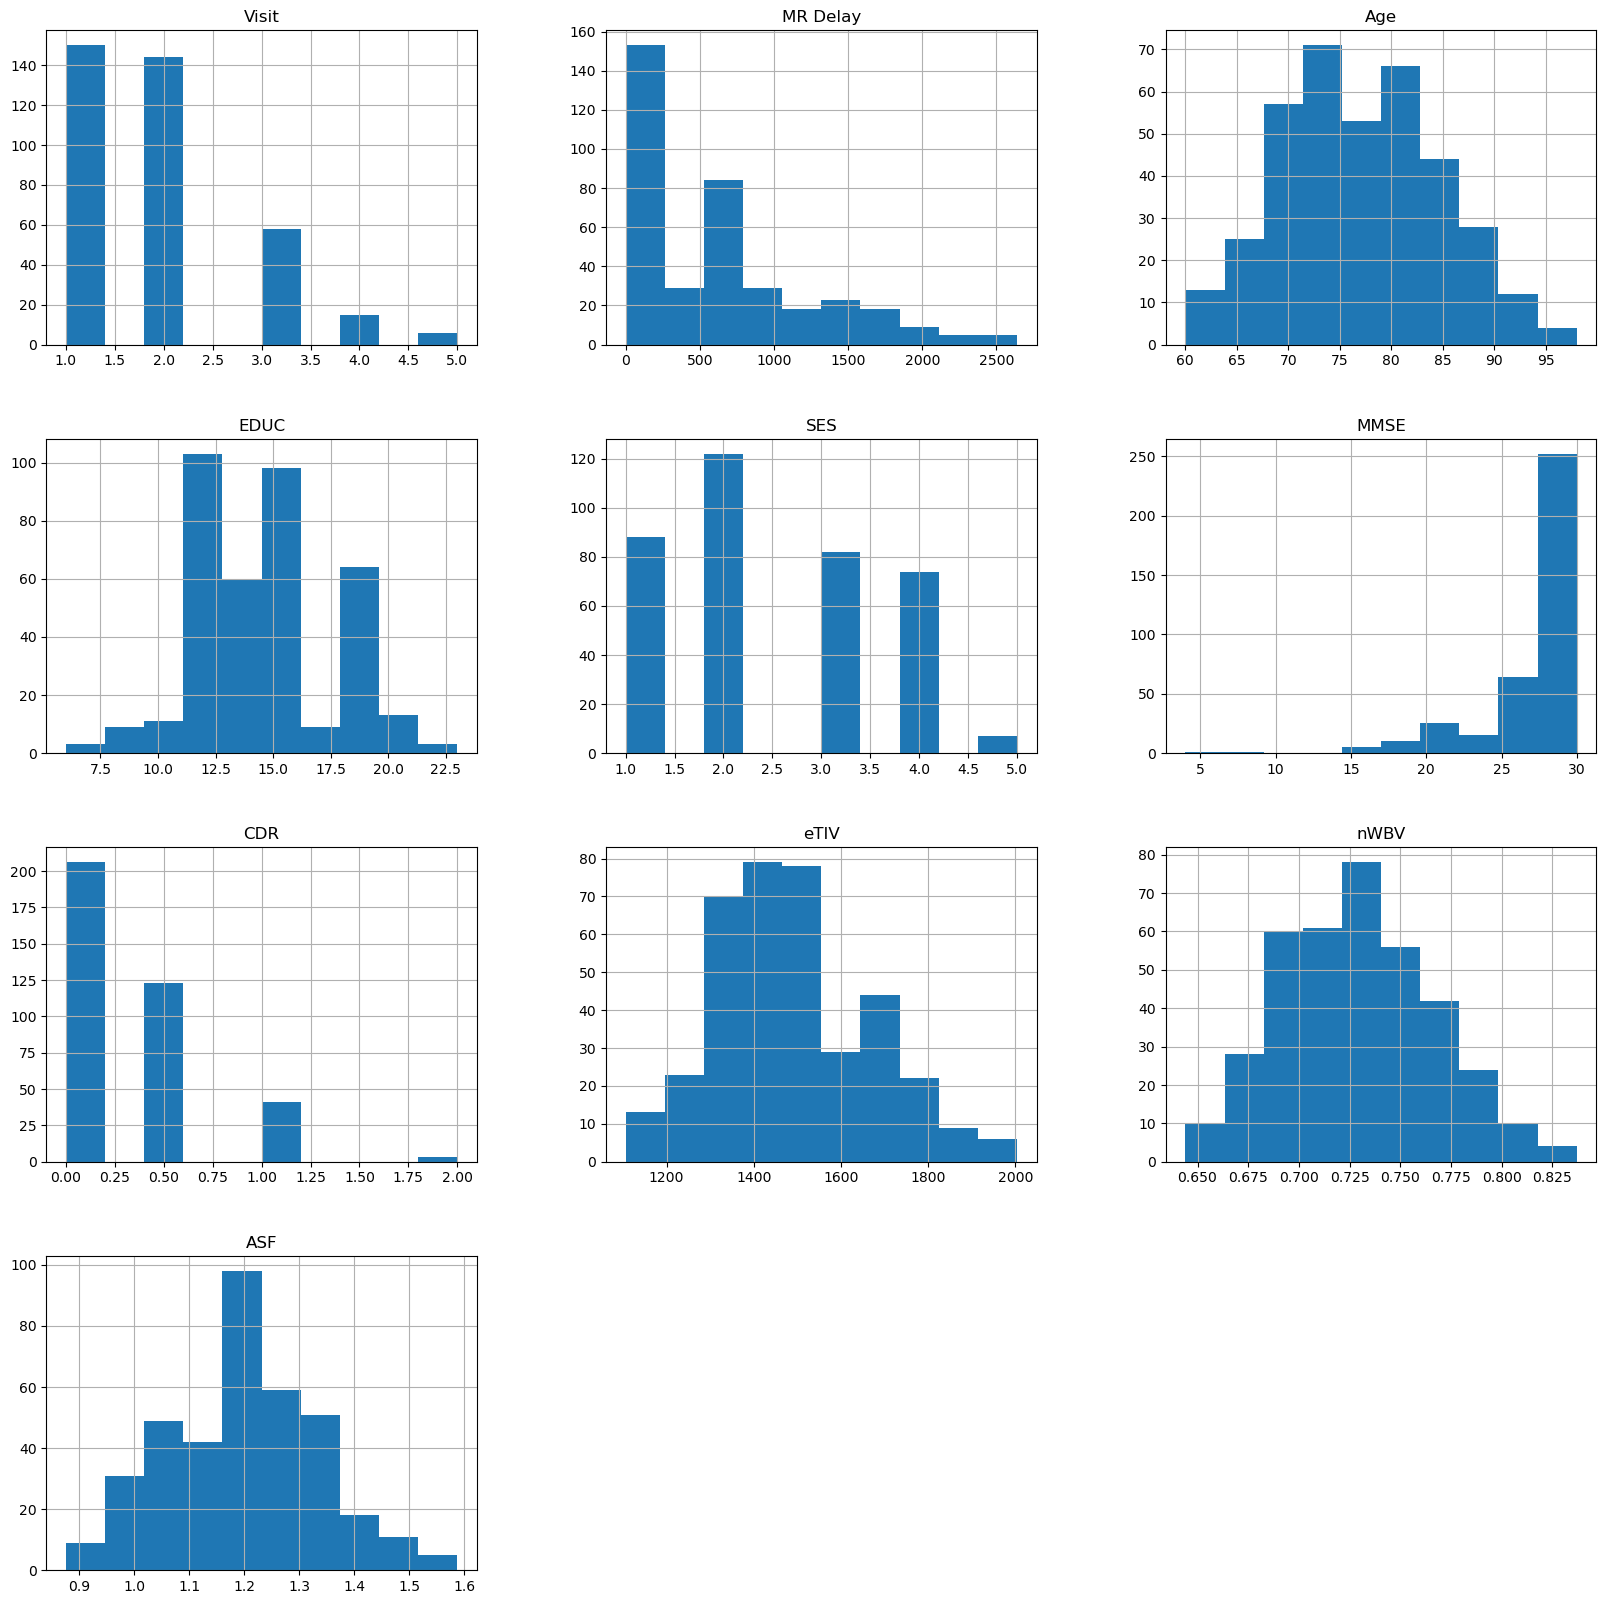

In [9]:
#Histograms
d_data.hist(figsize=(20,20))
plt.show()

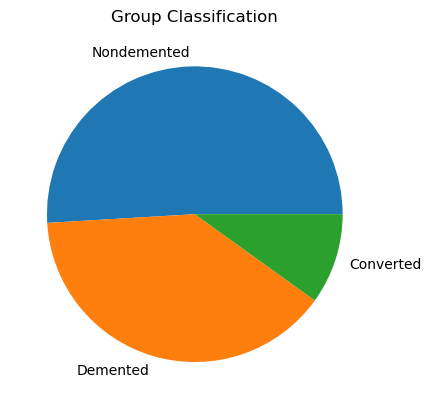

In [10]:
#Pie Chart
counts = d_data['Group'].value_counts()
plt.title("Group Classification")
plt.pie(counts, labels=['Nondemented','Demented','Converted'])
plt.show()

##Preparing Data For Model

In [11]:
#Removing Unnecessary attributes
d_data.drop("Subject ID",axis=1,inplace=True)
d_data.drop("MRI ID",axis=1,inplace=True)

In [12]:
#Preparing data for model
X=np.array(d_data.drop("Group",axis=1))
y=np.array(d_data.Group)

In [13]:
#Encoding Categorical on X
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
d_ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2]),('encoder1',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(d_ct.fit_transform(X))

In [14]:
#Encoding Categorical on y
from sklearn.preprocessing import LabelEncoder
d_lb=LabelEncoder()
y=d_lb.fit_transform(y)

##Scalling Features

In [15]:
#Scalling the features
d_scaler = StandardScaler()
X = d_scaler.fit_transform(X)

#Splitting the data into training and testing sets

In [16]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Training Models And Determining Their Accuracy

##Logistic regression

Logistic Regression performance:
Accuracy: 0.8533333333333334
Confusion Matrix: [[ 2  1  8]
 [ 1 31  0]
 [ 0  1 31]]
Classification Report:               precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.94      0.97      0.95        32
           2       0.79      0.97      0.87        32

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.84      0.85      0.82        75



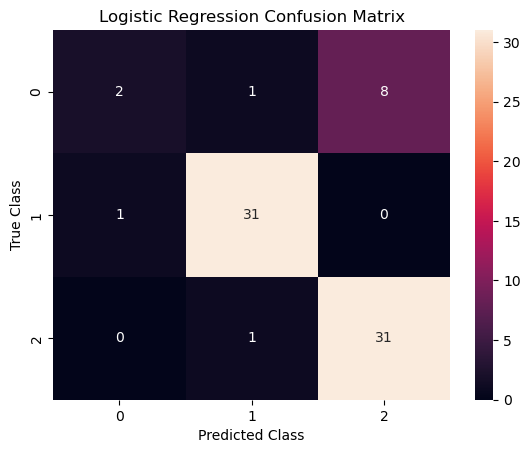

In [17]:
model=LogisticRegression()
name='Logistic Regression'
l_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##KNN

KNN performance:
Accuracy: 0.8266666666666667
Confusion Matrix: [[ 1  1  9]
 [ 1 29  2]
 [ 0  0 32]]
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.09      0.15        11
           1       0.97      0.91      0.94        32
           2       0.74      1.00      0.85        32

    accuracy                           0.83        75
   macro avg       0.74      0.67      0.65        75
weighted avg       0.80      0.83      0.79        75



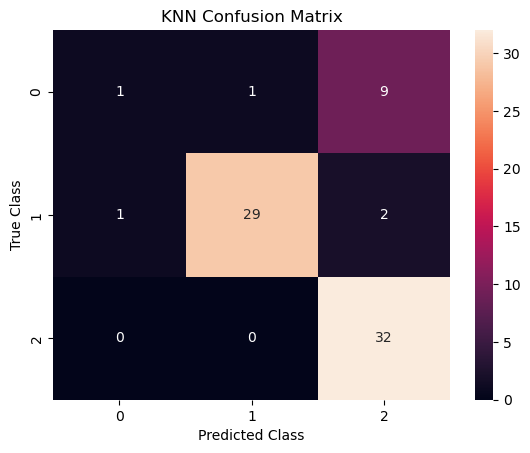

In [18]:
model= KNeighborsClassifier()
name='KNN'
k_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##Decision Tree

Decision Tree performance:
Accuracy: 0.84
Confusion Matrix: [[ 3  1  7]
 [ 2 30  0]
 [ 1  1 30]]
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.27      0.35        11
           1       0.94      0.94      0.94        32
           2       0.81      0.94      0.87        32

    accuracy                           0.84        75
   macro avg       0.75      0.72      0.72        75
weighted avg       0.82      0.84      0.82        75



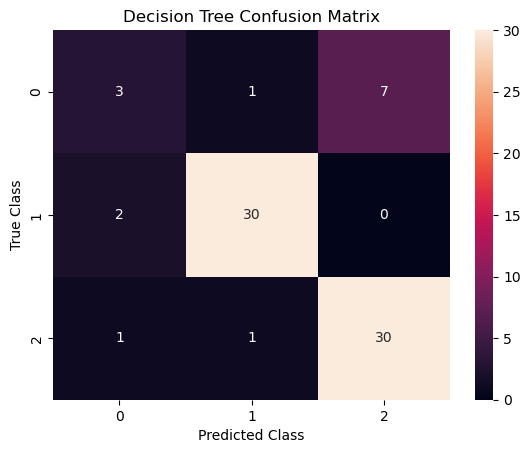

In [19]:
model= DecisionTreeClassifier()
name='Decision Tree'
d_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##RandomForest Classifier

Random Forest performance:
Accuracy: 0.88
Confusion Matrix: [[ 3  1  7]
 [ 0 32  0]
 [ 0  1 31]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           1       0.94      1.00      0.97        32
           2       0.82      0.97      0.89        32

    accuracy                           0.88        75
   macro avg       0.92      0.75      0.76        75
weighted avg       0.90      0.88      0.85        75



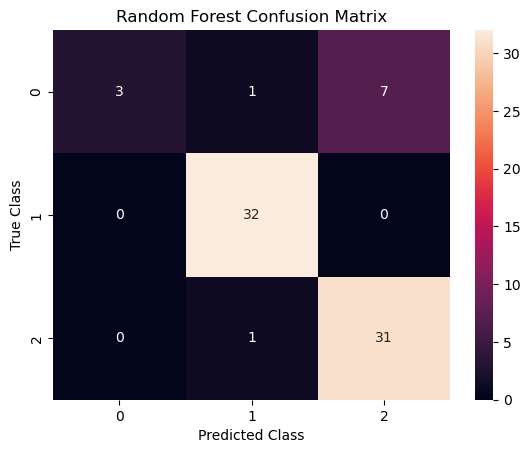

In [20]:
model=RandomForestClassifier()
name='Random Forest'
r_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##SVM

SVM performance:
Accuracy: 0.84
Confusion Matrix: [[ 1  2  8]
 [ 1 31  0]
 [ 0  1 31]]
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.09      0.15        11
           1       0.91      0.97      0.94        32
           2       0.79      0.97      0.87        32

    accuracy                           0.84        75
   macro avg       0.74      0.68      0.66        75
weighted avg       0.80      0.84      0.80        75



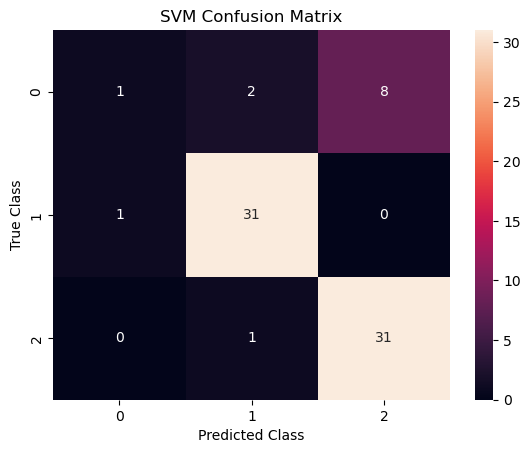

In [21]:
model = SVC()
name='SVM'
svm_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##Plotting Accuracy Of ALL Models 

In [22]:
d_acc_list=[l_acc,k_acc,d_acc,r_acc,svm_acc]
d_acc_list = [ round(elem, 2) for elem in d_acc_list ]
d_model_name=['Logistic regression','KNN','Decision Tree','RandomForest Classifier','SVM']

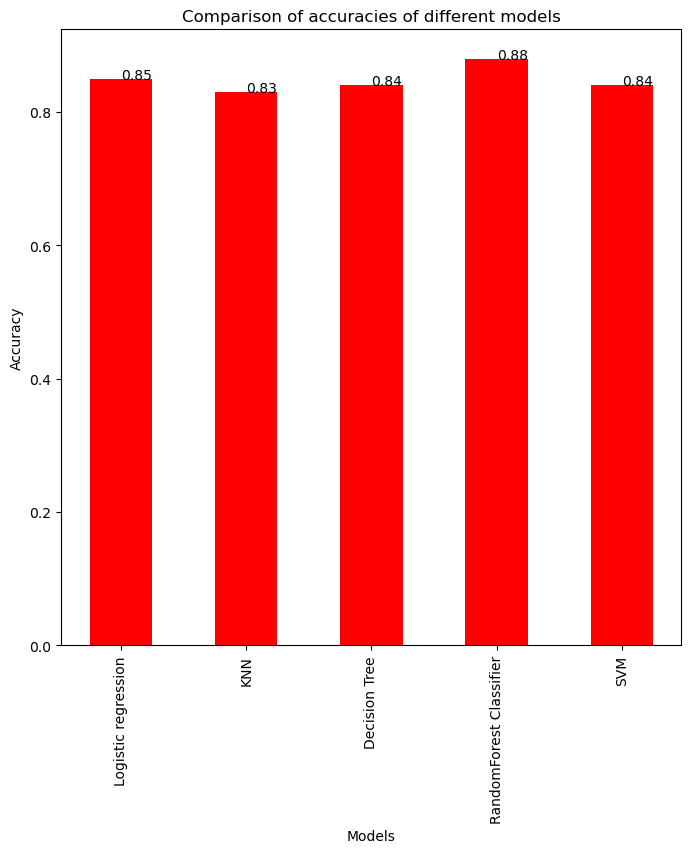

In [23]:
#Plotting accuracy of different model
plt.figure(figsize=(8,8))
plt.bar(d_model_name,d_acc_list,width=0.5,color="red")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of accuracies of different models")
plt.xticks(rotation = 90)
for i in range(len(d_model_name)):
        plt.text(i,d_acc_list[i],d_acc_list[i])
plt.show()

##Determining Accuracy of differenet ML algorithms on dataset

In [24]:
#implementing Lazypredict
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.63it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
XGBClassifier                      0.89               0.78    None      0.88   
LGBMClassifier                     0.88               0.77    None      0.86   
BaggingClassifier                  0.85               0.75    None      0.84   
CalibratedClassifierCV             0.87               0.72    None      0.83   
SGDClassifier                      0.87               0.72    None      0.83   
RandomForestClassifier             0.87               0.72    None      0.83   
Perceptron                         0.87               0.72    None      0.83   
LinearDiscriminantAnalysis         0.85               0.71    None      0.82   
LogisticRegression                 0.85               0.71    None      0.82   
LinearSVC                          0.85               0.71    None      0.82   
ExtraTreesClassifier               0.85 

##Predicting label

In [25]:
 d_model=LogisticRegression()
 d_model.fit(X_train,y_train)
 class d_getLabel:
    def getLabel(self,list):
            list=np.array(list,dtype=object).reshape(1,12)
            list=np.array(d_ct.transform(list))
            list=np.array(d_scaler.transform(list))
            result=d_model.predict(list)
            return d_lb.inverse_transform(result)


In [26]:
list=[1,0,'M','R',87,14,2.0,27.0,0.0,1987,0.696,0.883]
Dementia_predict=d_getLabel()
Dementia_predict.getLabel(list)

array(['Nondemented'], dtype=object)

#Parkinson's Disease Prediction

##Importing Dataset

In [27]:
#Loading Data Set
p_data=pd.read_csv("E:/ml_class_project/Parkinsson disease.csv")

##Exploring Dataset

In [28]:
#Printing First Five Rows
print(p_data.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1       119.99        157.30         75.00            0.01   
1  phon_R01_S01_2       122.40        148.65        113.82            0.01   
2  phon_R01_S01_3       116.68        131.11        111.56            0.01   
3  phon_R01_S01_4       116.68        137.87        111.37            0.01   
4  phon_R01_S01_5       116.01        141.78        110.66            0.01   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0              0.00      0.00      0.01        0.01          0.04  ...   
1              0.00      0.00      0.01        0.01          0.06  ...   
2              0.00      0.01      0.01        0.02          0.05  ...   
3              0.00      0.01      0.01        0.02          0.05  ...   
4              0.00      0.01      0.01        0.02          0.06  ...   

   Shimmer:DDA  NHR   HNR  status  RPDE  DFA  spread1  spread2   D2  PPE  
0         0

In [29]:
#Printing Last Five Rows
print(p_data.tail())

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2       174.19        230.98         94.26            0.00   
191  phon_R01_S50_3       209.52        253.02         89.49            0.01   
192  phon_R01_S50_4       174.69        240.00         74.29            0.01   
193  phon_R01_S50_5       198.76        396.96         74.90            0.01   
194  phon_R01_S50_6       214.29        260.28         77.97            0.01   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
190              0.00      0.00      0.00        0.01          0.04  ...   
191              0.00      0.00      0.00        0.01          0.03  ...   
192              0.00      0.01      0.01        0.02          0.02  ...   
193              0.00      0.00      0.00        0.01          0.02  ...   
194              0.00      0.00      0.00        0.01          0.02  ...   

     Shimmer:DDA  NHR   HNR  status  RPDE  DFA  spread1  sprea

In [30]:
#Describing Data
print(p_data.describe())

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count       195.00        195.00        195.00          195.00   
mean        154.23        197.10        116.32            0.01   
std          41.39         91.49         43.52            0.00   
min          88.33        102.14         65.48            0.00   
25%         117.57        134.86         84.29            0.00   
50%         148.79        175.83        104.31            0.00   
75%         182.77        224.21        140.02            0.01   
max         260.11        592.03        239.17            0.03   

       MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count            195.00    195.00    195.00      195.00        195.00   
mean               0.00      0.00      0.00        0.01          0.03   
std                0.00      0.00      0.00        0.01          0.02   
min                0.00      0.00      0.00        0.00          0.01   
25%                0.00      0.00      0

In [31]:
#Checking For Missing Values
print(p_data.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


##Visualizing Dataset

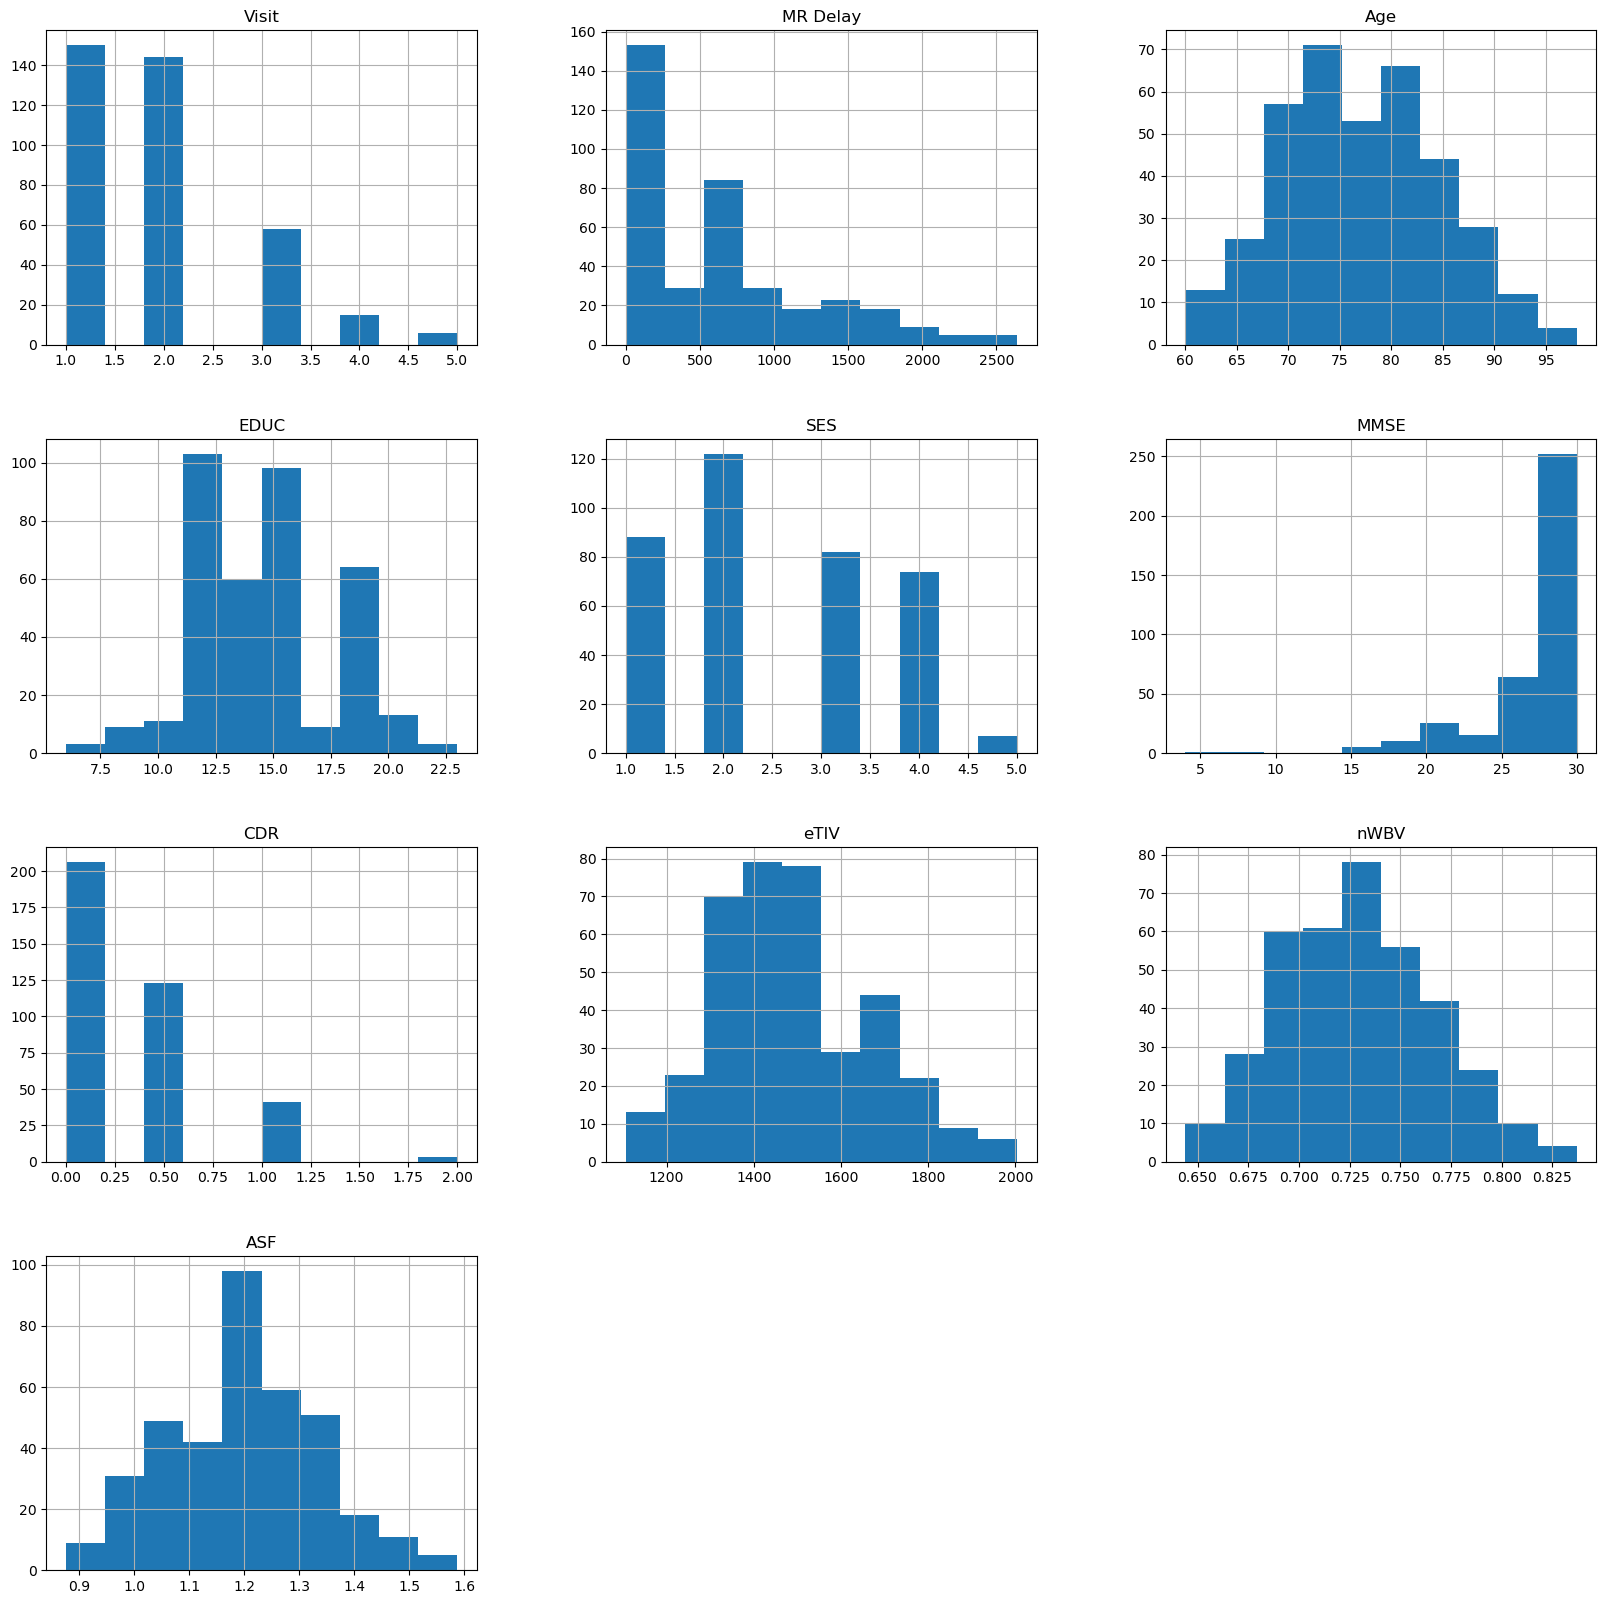

In [32]:
#Histograms
d_data.hist(figsize=(20,20))
plt.show()

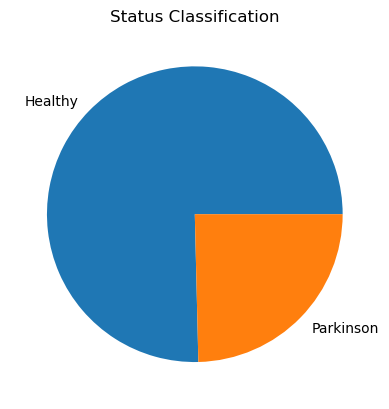

In [33]:
#Pie Chart
counts = p_data['status'].value_counts()
plt.title("Status Classification")
plt.pie(counts, labels=['Healthy', 'Parkinson'])
plt.show()

##Preparing Data For Model

In [34]:
#Removing Unnecessary attributes
p_data.drop('name',axis=1,inplace=True)

In [35]:
#Preparing data for model
X=p_data.drop("status",axis=1)
y=p_data.status
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.99,157.30,75.00,0.01,0.00,0.00,0.01,0.01,0.04,0.43,...,0.03,0.07,0.02,21.03,0.41,0.82,-4.81,0.27,2.30,0.28
1,122.40,148.65,113.82,0.01,0.00,0.00,0.01,0.01,0.06,0.63,...,0.04,0.09,0.02,19.09,0.46,0.82,-4.08,0.34,2.49,0.37
2,116.68,131.11,111.56,0.01,0.00,0.01,0.01,0.02,0.05,0.48,...,0.04,0.08,0.01,20.65,0.43,0.83,-4.44,0.31,2.34,0.33
3,116.68,137.87,111.37,0.01,0.00,0.01,0.01,0.02,0.05,0.52,...,0.04,0.09,0.01,20.64,0.43,0.82,-4.12,0.33,2.41,0.37
4,116.01,141.78,110.66,0.01,0.00,0.01,0.01,0.02,0.06,0.58,...,0.04,0.10,0.02,19.65,0.42,0.82,-3.75,0.23,2.33,0.41


##Scalling Features

In [36]:
#Scalling the features
p_scaler = StandardScaler()
X = p_scaler.fit_transform(X)

#Splitting the data into training and testing sets

In [37]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(156, 22)

##Training Models And Determining Their Accuracy

##Logistic regression

Logistic Regression performance:
Accuracy: 0.8974358974358975
Confusion Matrix: [[ 3  4]
 [ 0 32]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



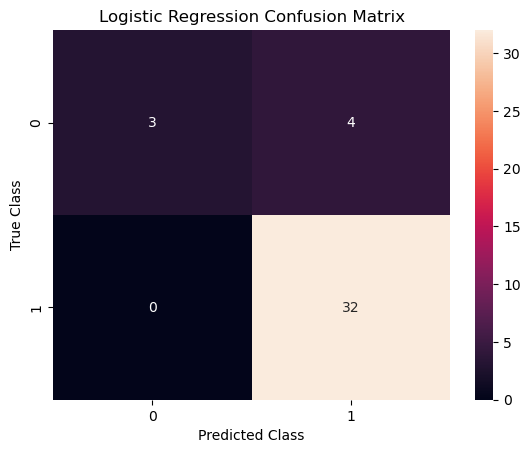

In [38]:
model=LogisticRegression()
name='Logistic Regression'
l_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##KNN

KNN performance:
Accuracy: 0.9487179487179487
Confusion Matrix: [[ 5  2]
 [ 0 32]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



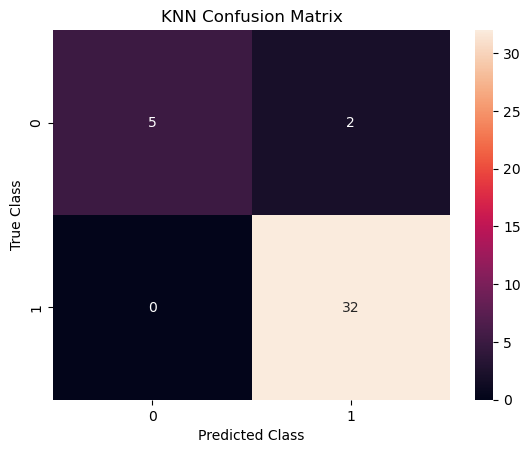

In [39]:
model= KNeighborsClassifier()
name='KNN'
k_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##Decision Tree

Decision Tree performance:
Accuracy: 0.8974358974358975
Confusion Matrix: [[ 5  2]
 [ 2 30]]
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39



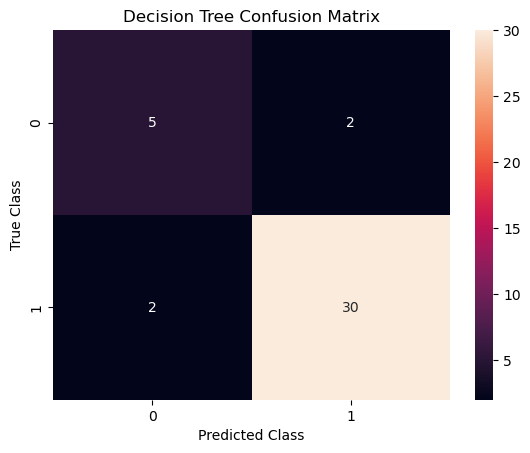

In [40]:
model= DecisionTreeClassifier()
name='Decision Tree'
d_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##RandomForest Classifier

Random Forest performance:
Accuracy: 0.9487179487179487
Confusion Matrix: [[ 5  2]
 [ 0 32]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



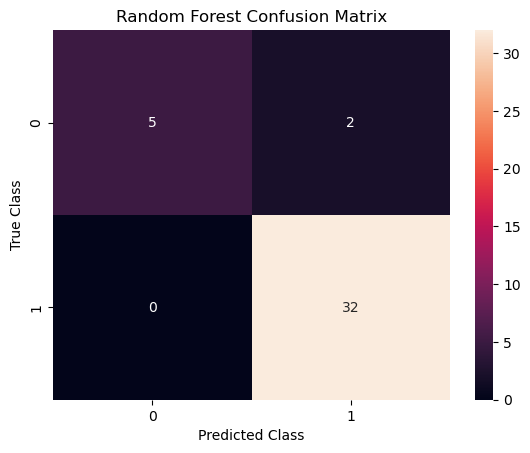

In [41]:
model=RandomForestClassifier()
name='Random Forest'
r_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##SVM

SVM performance:
Accuracy: 0.8974358974358975
Confusion Matrix: [[ 3  4]
 [ 0 32]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



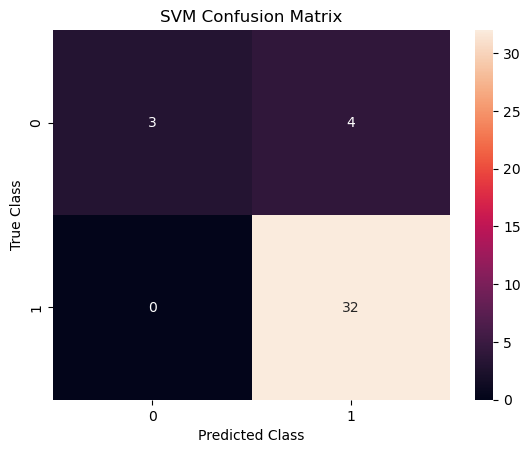

In [42]:
model = SVC()
name='SVM'
svm_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##Plotting Accuracy Of ALL Models 

In [43]:
p_acc_list=[l_acc,k_acc,d_acc,r_acc,svm_acc]
p_acc_list = [ round(elem, 2) for elem in p_acc_list ]
p_model_name=['Logistic regression','KNN','Decision Tree','RandomForest Classifier','SVM']

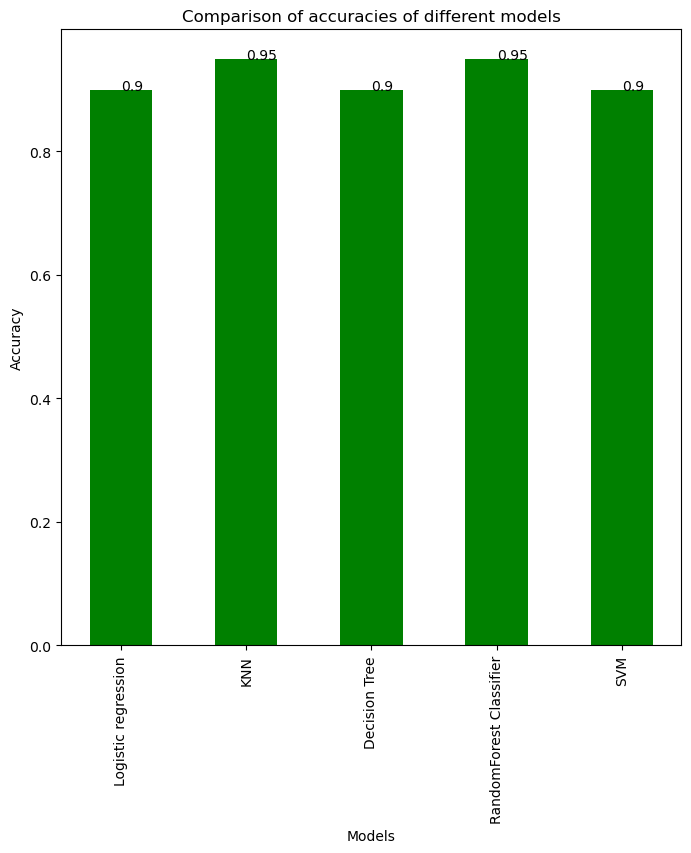

In [44]:
#Plotting accuracy of different model
plt.figure(figsize=(8,8))
plt.bar(p_model_name,p_acc_list,width=0.5,color="green")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of accuracies of different models")
plt.xticks(rotation = 90)
for i in range(len(p_model_name)):
        plt.text(i,p_acc_list[i],p_acc_list[i])
plt.show()

##Determining Accuracy of differenet ML algorithms on dataset

In [45]:
#implementing Lazypredict
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 42.75it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.97               0.98     0.98      0.98   
LabelSpreading                     0.97               0.98     0.98      0.98   
LGBMClassifier                     0.95               0.86     0.86      0.95   
XGBClassifier                      0.95               0.86     0.86      0.95   
ExtraTreesClassifier               0.95               0.86     0.86      0.95   
RandomForestClassifier             0.95               0.86     0.86      0.95   
KNeighborsClassifier               0.95               0.86     0.86      0.95   
DecisionTreeClassifier             0.92               0.84     0.84      0.92   
BaggingClassifier                  0.90               0.83     0.83      0.90   
Perceptron                         0.87               0.81     0.81      0.88   
CalibratedClassifierCV      

##Predicting Label

In [46]:
 p_model=KNeighborsClassifier()
 p_model.fit(X_train,y_train)
 class p_getLabel:
           def getLabel(self,list):
               list=np.array(list,dtype=object).reshape(1,22)
               list=p_scaler.transform(list)
               return p_model.predict(list)
    

In [47]:
list=[119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654]
Parkinson_predict=p_getLabel()
Parkinson_predict.getLabel(list)

array([1], dtype=int64)

#Brain Stroke Prediction

##Importing Dataset

In [48]:
#Loading Data Set
bs_data=pd.read_csv("E:/ml_class_project/brain_stroke.csv")

##Exploring Dataset

In [49]:
#Printing First Five Rows
print(bs_data.head())


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male 67.00             0              1          Yes        Private   
1    Male 80.00             0              1          Yes        Private   
2  Female 49.00             0              0          Yes        Private   
3  Female 79.00             1              0          Yes  Self-employed   
4    Male 81.00             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69 36.60  formerly smoked       1  
1          Rural             105.92 32.50     never smoked       1  
2          Urban             171.23 34.40           smokes       1  
3          Rural             174.12 24.00     never smoked       1  
4          Urban             186.21 29.00  formerly smoked       1  


In [50]:
#Printing Last Five Rows
print(bs_data.tail())

      gender   age  hypertension  heart_disease ever_married work_type  \
4976    Male 41.00             0              0           No   Private   
4977    Male 40.00             0              0          Yes   Private   
4978  Female 45.00             1              0          Yes  Govt_job   
4979    Male 40.00             0              0          Yes   Private   
4980  Female 80.00             1              0          Yes   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
4976          Rural              70.15 29.80  formerly smoked       0  
4977          Urban             191.15 31.10           smokes       0  
4978          Rural              95.02 31.80           smokes       0  
4979          Rural              83.94 30.00           smokes       0  
4980          Urban              83.75 29.10     never smoked       0  


In [51]:
#Describing Data
print(bs_data.describe())

          age  hypertension  heart_disease  avg_glucose_level     bmi  stroke
count 4981.00       4981.00        4981.00            4981.00 4981.00 4981.00
mean    43.42          0.10           0.06             105.94   28.50    0.05
std     22.66          0.29           0.23              45.08    6.79    0.22
min      0.08          0.00           0.00              55.12   14.00    0.00
25%     25.00          0.00           0.00              77.23   23.70    0.00
50%     45.00          0.00           0.00              91.85   28.10    0.00
75%     61.00          0.00           0.00             113.86   32.60    0.00
max     82.00          1.00           1.00             271.74   48.90    1.00


In [52]:
#Checking For Missing Values
print(bs_data.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


##Visualizing Dataset

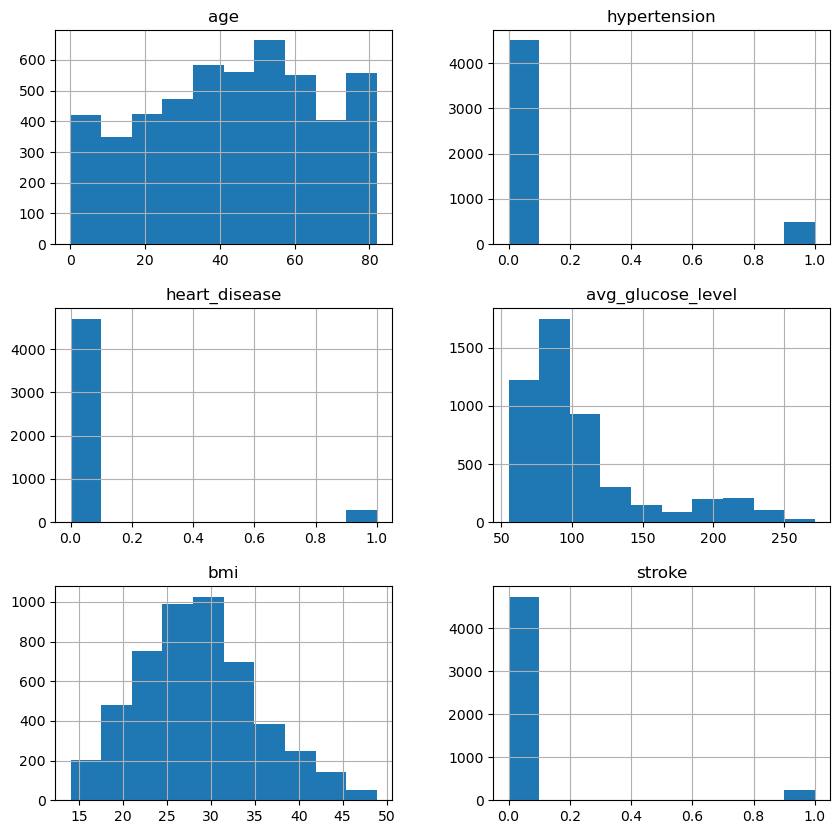

In [53]:
#Histograms
bs_data.hist(figsize=(10,10))
plt.show()

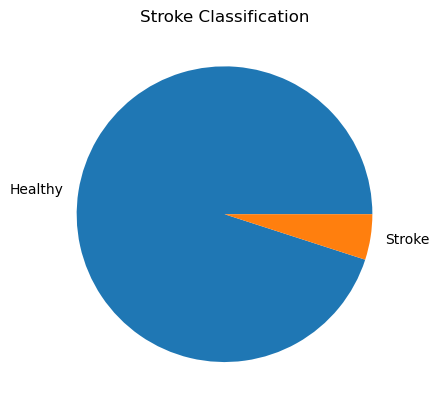

In [54]:
#Pie Chart
counts = bs_data['stroke'].value_counts()
plt.title("Stroke Classification")
plt.pie(counts, labels=['Healthy','Stroke'])
plt.show()

##Preparing Data For Model

In [55]:
#Preparing data for model
X=np.array(bs_data.drop("stroke",axis=1))
y=np.array(bs_data.stroke)

##Encoding Categoricals

In [56]:
bs_ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0]),('encoder1',OneHotEncoder(),[4]),('encoder2',OneHotEncoder(),[5]),('encoder3',OneHotEncoder(),[6]),('encoder4',OneHotEncoder(),[9])],remainder='passthrough')
X=np.array(bs_ct.fit_transform(X))

##Scalling Features

In [57]:
#Scalling the features
bs_scaler = StandardScaler()
X = bs_scaler.fit_transform(X)

#Splitting the data into training and testing sets

In [58]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Training Models And Determining Their Accuracy

##Logistic regression

Logistic Regression performance:
Accuracy: 0.9458375125376128
Confusion Matrix: [[943   0]
 [ 54   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



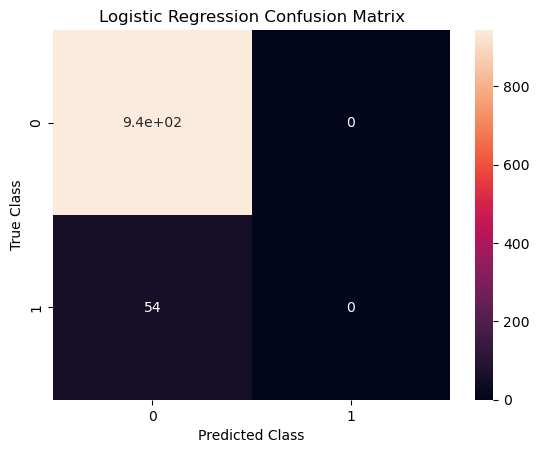

In [59]:
model=LogisticRegression()
name='Logistic Regression'
l_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##KNN

KNN performance:
Accuracy: 0.9428284854563691
Confusion Matrix: [[939   4]
 [ 53   1]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.20      0.02      0.03        54

    accuracy                           0.94       997
   macro avg       0.57      0.51      0.50       997
weighted avg       0.91      0.94      0.92       997



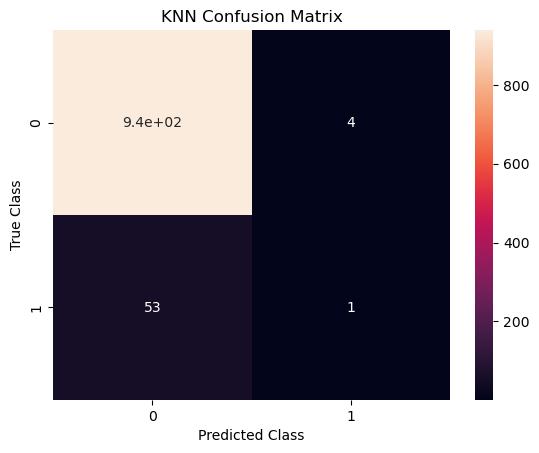

In [60]:
model= KNeighborsClassifier()
name='KNN'
k_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##Decision Tree

Decision Tree performance:
Accuracy: 0.921765295887663
Confusion Matrix: [[905  38]
 [ 40  14]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96       943
           1       0.27      0.26      0.26        54

    accuracy                           0.92       997
   macro avg       0.61      0.61      0.61       997
weighted avg       0.92      0.92      0.92       997



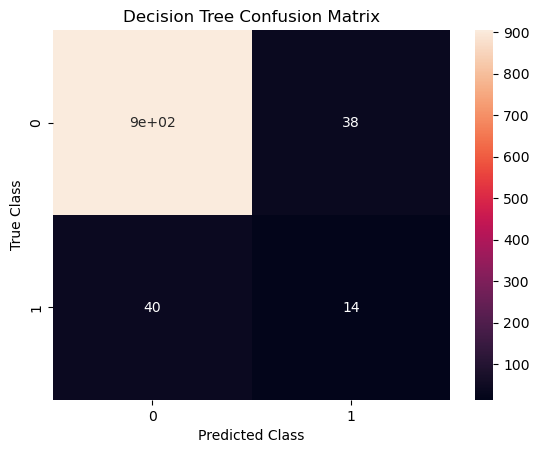

In [61]:
model= DecisionTreeClassifier()
name='Decision Tree'
d_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##RandomForest Classifier

Random Forest performance:
Accuracy: 0.9408224674022067
Confusion Matrix: [[938   5]
 [ 54   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.89      0.94      0.92       997



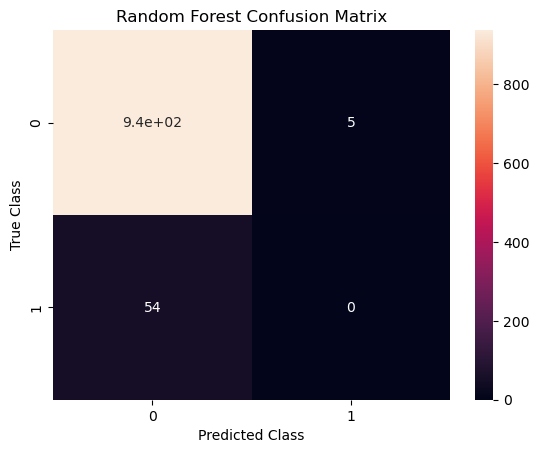

In [62]:
model=RandomForestClassifier()
name='Random Forest'
r_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##SVM

SVM performance:
Accuracy: 0.9458375125376128
Confusion Matrix: [[943   0]
 [ 54   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



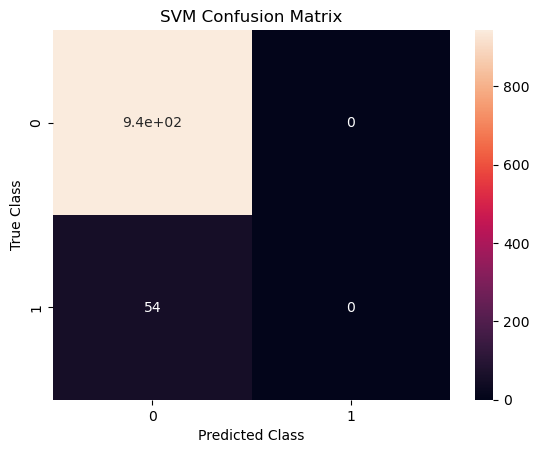

In [63]:
model = SVC()
name='SVM'
svm_acc=apply_model(model, X_train, X_test, y_train, y_test,name)

##Plotting Accuracy Of ALL Models 

In [64]:
bs_acc_list=[l_acc,k_acc,d_acc,r_acc,svm_acc]
bs_acc_list = [ round(elem, 2) for elem in bs_acc_list ]
bs_model_name=['Logistic regression','KNN','Decision Tree','RandomForest Classifier','SVM']

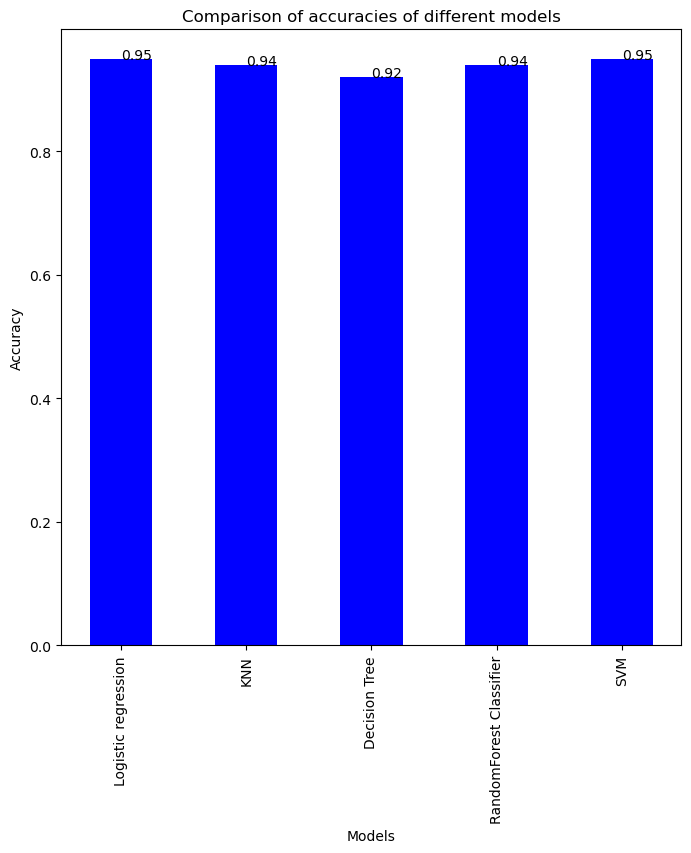

In [65]:
#Plotting accuracy of different model
plt.figure(figsize=(8,8))
plt.bar(bs_model_name,bs_acc_list,width=0.5,color="blue")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of accuracies of different models")
plt.xticks(rotation = 90)
for i in range(len(bs_model_name)):
        plt.text(i,bs_acc_list[i],bs_acc_list[i])
plt.show()

##Determining Accuracy of differenet ML algorithms on dataset

In [66]:
#implementing Lazypredict
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  5.59it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.68               0.74     0.74      0.77   
GaussianNB                         0.75               0.70     0.70      0.82   
DecisionTreeClassifier             0.92               0.63     0.63      0.92   
BernoulliNB                        0.92               0.59     0.59      0.92   
QuadraticDiscriminantAnalysis      0.41               0.58     0.58      0.53   
LinearDiscriminantAnalysis         0.95               0.55     0.55      0.93   
BaggingClassifier                  0.94               0.53     0.53      0.92   
LGBMClassifier                     0.94               0.52     0.52      0.92   
XGBClassifier                      0.94               0.52     0.52      0.92   
PassiveAggressiveClassifier        0.94               0.51     0.51      0.92   
ExtraTreeClassifier         

##Predicting Label

In [67]:
  
  bs_model=SVC()
  bs_model.fit(X_train,y_train)
  class bs_getLabel:
      def getLabel(self,list):
             list=np.array(list,dtype=object).reshape(1,10)
             list=np.array(bs_ct.transform(list))
             list=np.array(bs_scaler.transform(list))
             return bs_model.predict(list)

In [68]:
list=['Male',50,1,1,'Yes','Self-employed','Urban',90.00,2.2,'formerly smoked']
BrainStroke_predict=bs_getLabel()
BrainStroke_predict.getLabel(list)

array([0], dtype=int64)

#Analysing all models on all dataset

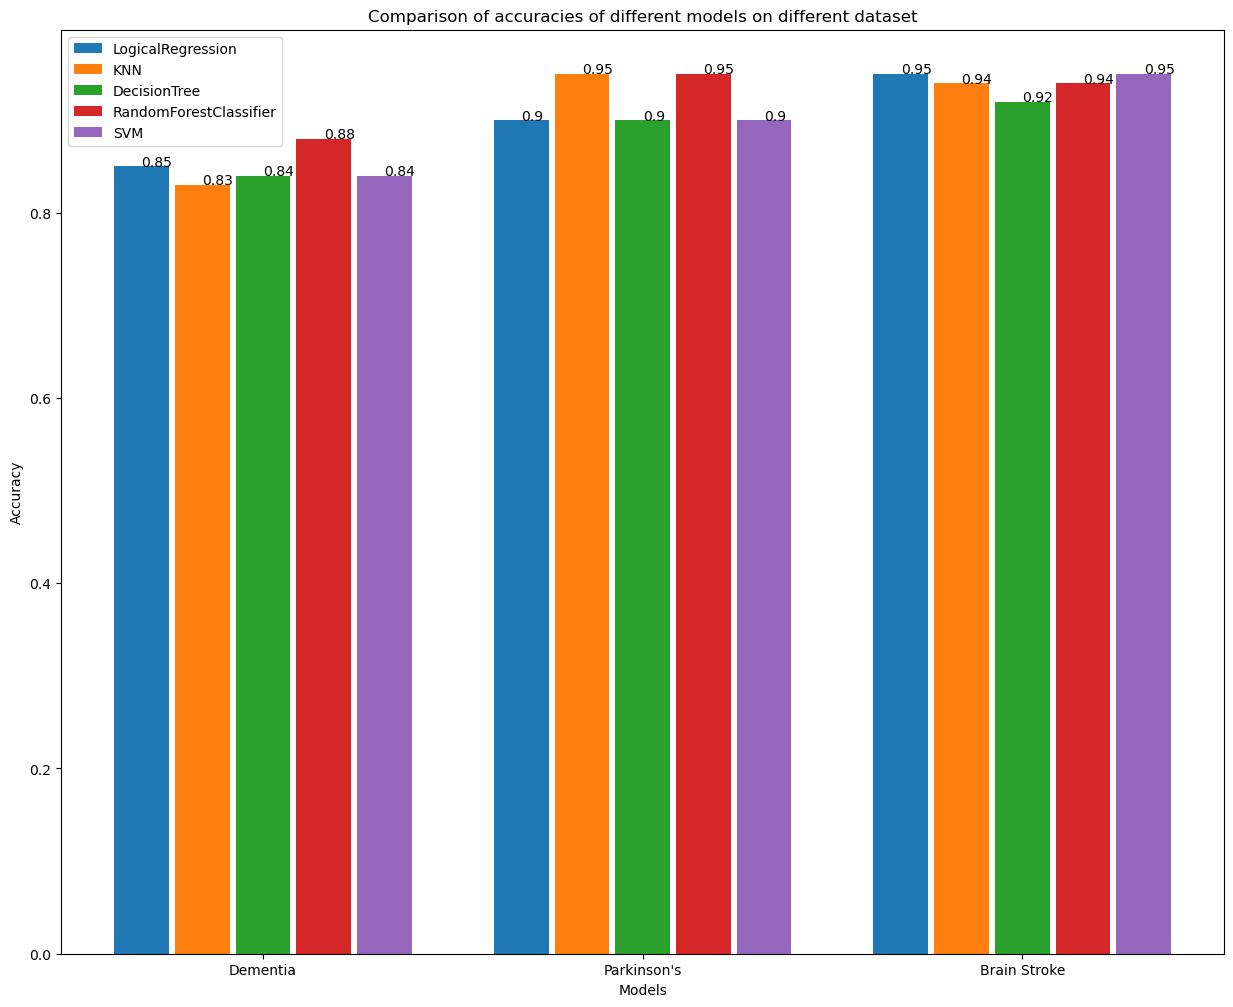

In [69]:
#Plotting accuracies of different model on different dataset
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])
            ax.text(x + x_offset,y,y)

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


if __name__ == "__main__":
    # Usage example:
    data = {
      "LogicalRegression":[d_acc_list[0],p_acc_list[0],bs_acc_list[0]],
      "KNN":[d_acc_list[1],p_acc_list[1],bs_acc_list[1]],
      "DecisionTree":[d_acc_list[2],p_acc_list[2],bs_acc_list[2]],
      "RandomForestClassifier":[d_acc_list[3],p_acc_list[3],bs_acc_list[3]],
      "SVM":[d_acc_list[4],p_acc_list[4],bs_acc_list[4]]
    }
    disease=["Dementia","Parkinson's","Brain Stroke"]
    x_axis=np.arange(len(disease))
    fig, ax = plt.subplots(figsize=(15,12))
    bar_plot(ax, data, total_width=.8, single_width=.9)
    plt.xticks(x_axis,disease)
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
    plt.title("Comparison of accuracies of different models on different dataset")
    plt.show()